In [21]:
import torch, torchvision


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
num_classes = 29

model = torch.hub.load('facebookresearch/detr',
                       'detr_resnet50',
                       pretrained=False,
                       num_classes=num_classes)

checkpoint = torch.load('/content/drive/My Drive/backup5/checkpoint.pth',
                        map_location='cpu')

model.load_state_dict(checkpoint['model'],
                      strict=False)

model.eval();

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_master


In [24]:
# Fine-tuned classes
#Change the Required classes according to your use-case but they should be from the list of finetuned_classes.
finetuned_classes = [ 'N/A' , 'face', 'a106_address_current_all', 'a107_address_home_all', 'a108_license_plate_all', 'body', 'a110_nudity_all', 'name', 'a18_ethnic_clothing', 'birth_date', 'a26_handwriting', 'a29_ausweis', 'a30_credit_card', 'a31_passport', 'a32_drivers_license', 'a33_student_id', 'a35_mail', 'a37_receipt', 'a38_ticket', 'a39_disability_physical', 'a43_medicine', 'a49_phone', 'a70_education_history', 'a73_landmark', 'a7_fingerprint', 'date_time', 'a85_username', 'a8_signature', 'a90_email']
Required_classes = [ 'body', 'a110_nudity_all','a30_credit_card', 'a31_passport', 'a32_drivers_license', 'a33_student_id', 'a37_receipt', 'a38_ticket','a29_ausweis']

def plot_finetuned_results(pil_img, prob=None, boxes=None):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
   # if prob is not None and boxes is not None:
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        cl = p.argmax()
    #if finetuned_classes[cl] not in Required_classes:
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                        fill=False, color=c, linewidth=3))
        cl = p.argmax()
        text = f'{finetuned_classes[cl]}: {p[cl]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [37]:
def run_worflow(my_image, my_model):
  # mean-std normalize the input image (batch-size: 1)
  img = transform(my_image).unsqueeze(0)

  # propagate through the model
  outputs = my_model(img)
#you can change the threshold for object detection
  for threshold in [0.5,0.6,0.7]:
    
    probas_to_keep, bboxes_scaled = filter_bboxes_from_outputs(outputs,
                                                              threshold=threshold)

    plot_finetuned_results(my_image,
                           probas_to_keep, 
                           bboxes_scaled)


In [27]:
import torchvision.transforms as T

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [28]:
def filter_bboxes_from_outputs(outputs,
                               threshold=0.7):
  
  # keep only predictions with confidence above threshold
  probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
  keep = probas.max(-1).values > threshold

  probas_to_keep = probas[keep]

  # convert boxes from [0; 1] to image scales
  bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)
  
  return probas_to_keep, bboxes_scaled

In [29]:
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [30]:
import matplotlib.pyplot as plt

def plot_results(pil_img, prob=None, boxes=None):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    if prob is not None and boxes is not None:
      for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=c, linewidth=3))
          cl = p.argmax()
          text = f'{CLASSES[cl]}: {p[cl]:0.2f}'
          ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

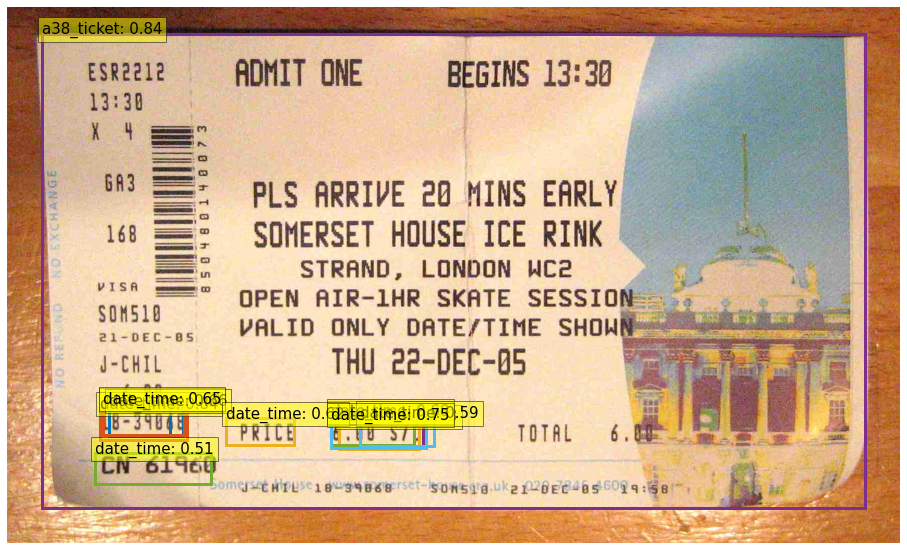

In [35]:
from PIL import Image

img_name = '/content/new_val2/2017_12135740.jpg'
im = Image.open(img_name)

run_worflow(im,
            model)

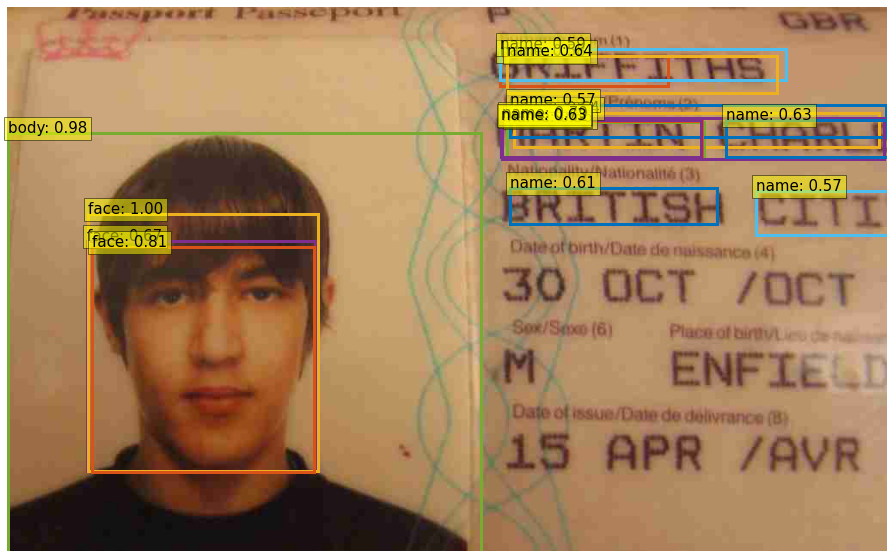

In [34]:
img_name = '/content/new_val2/2017_12276591.jpg'
im = Image.open(img_name)

run_worflow(im,
            model)

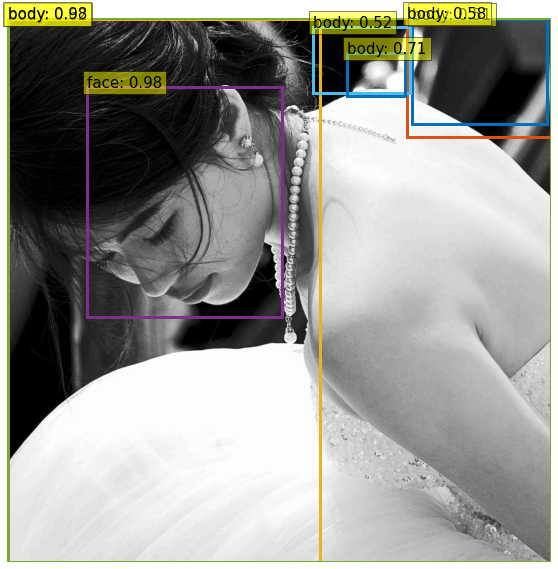

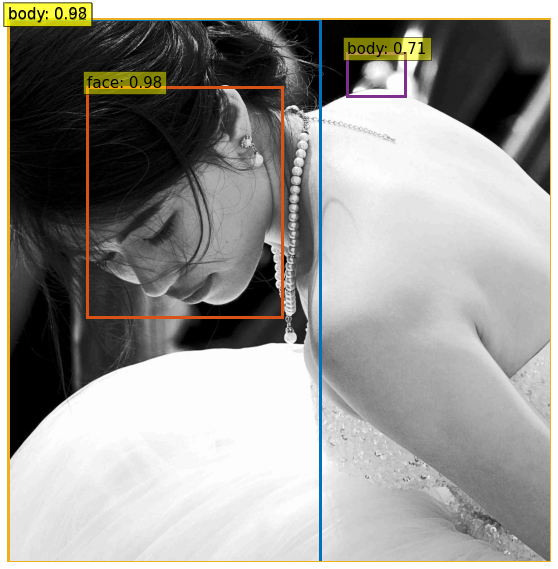

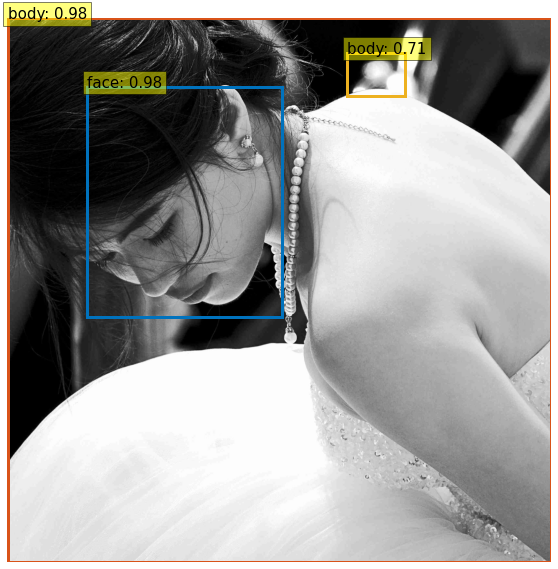

In [38]:
img_name = '/content/new_val2/2017_13766817.jpg'
im = Image.open(img_name)

run_worflow(im,
            model)

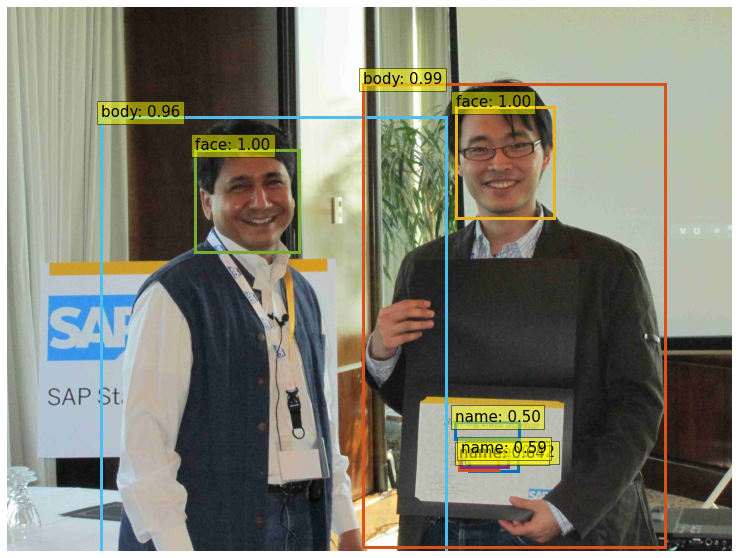

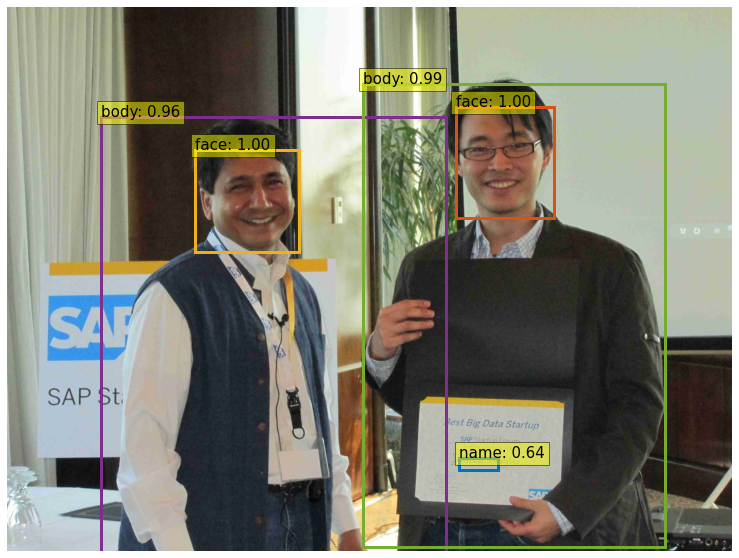

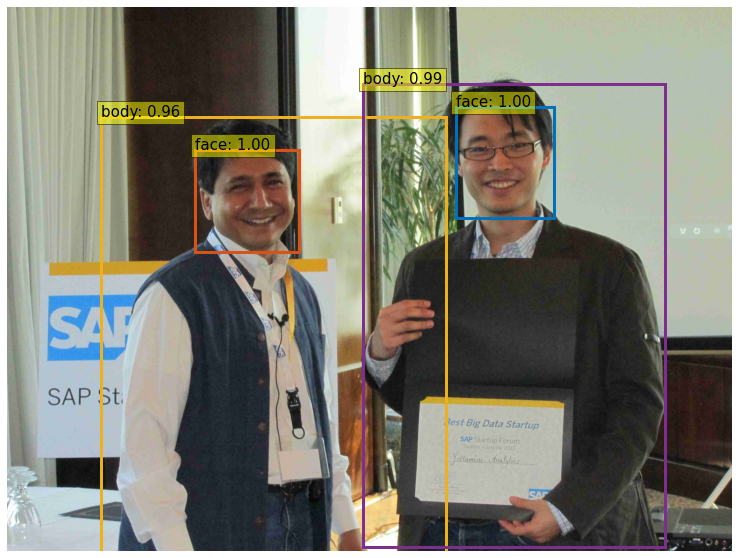

In [39]:
img_name = '/content/new_val2/2017_13620731.jpg'
im = Image.open(img_name)

run_worflow(im,
            model)

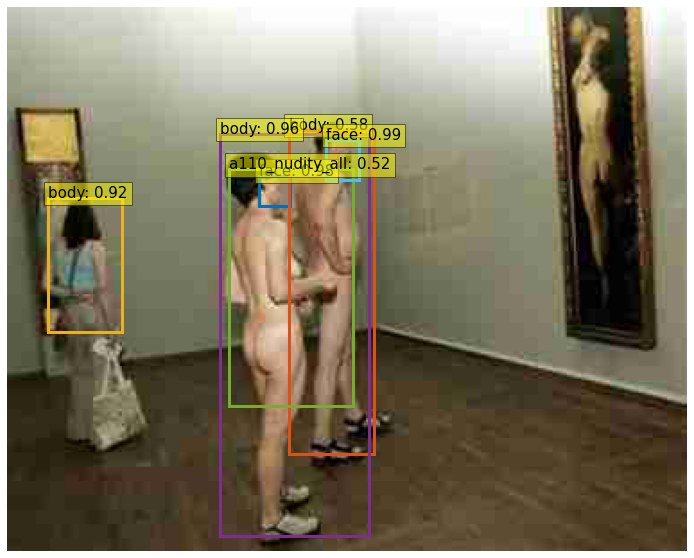

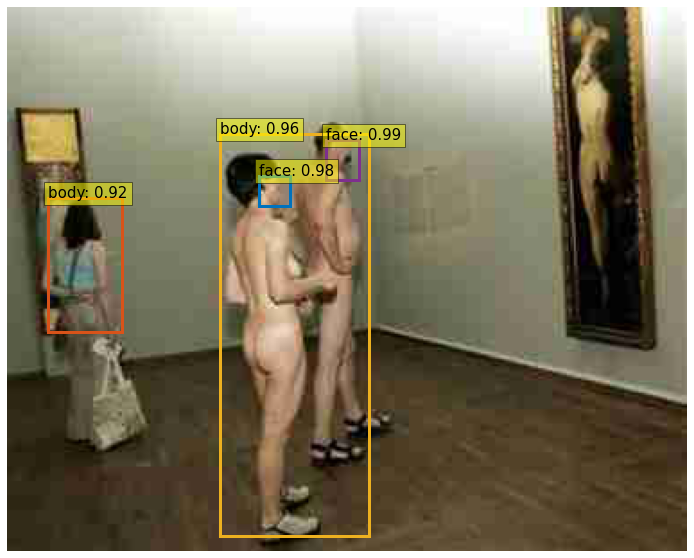

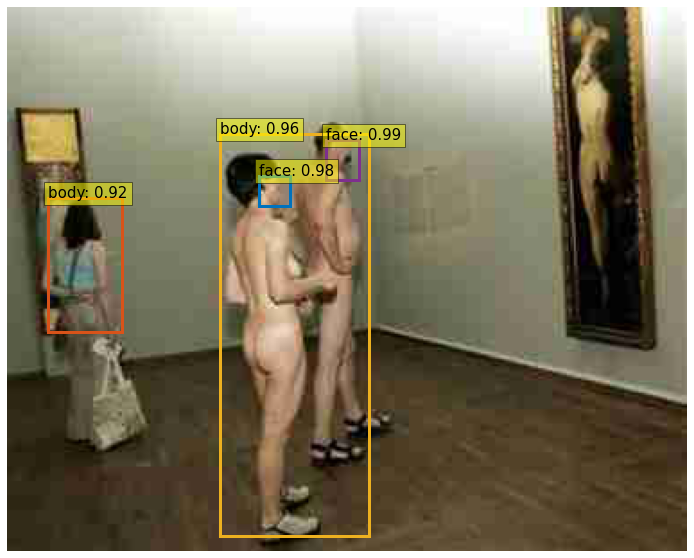

In [40]:
img_name = '/content/new_val2/2017_19086101.jpg'
im = Image.open(img_name)

run_worflow(im,
            model)

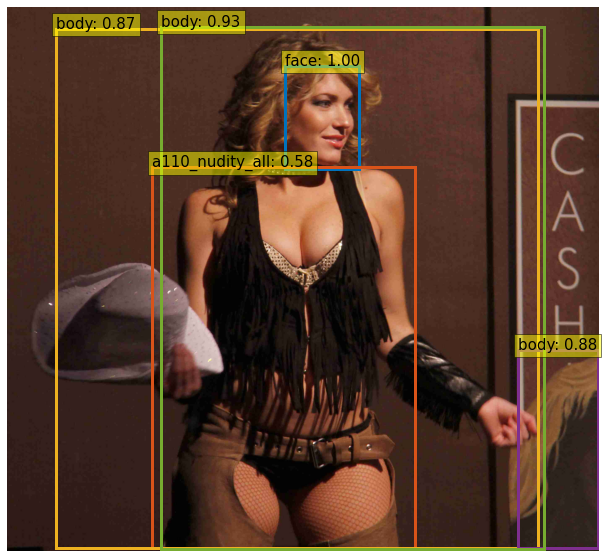

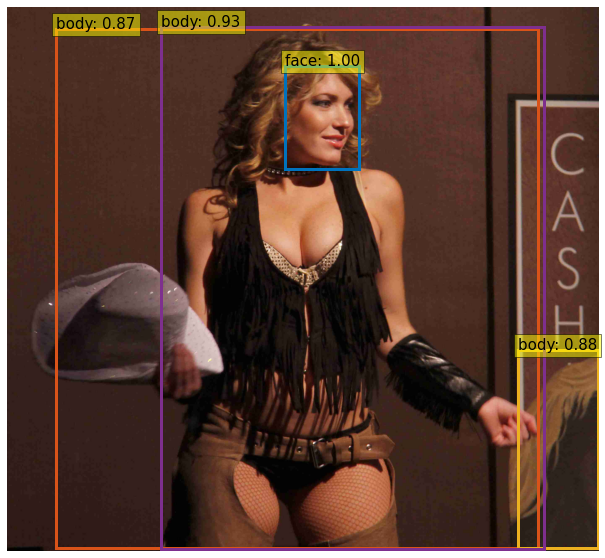

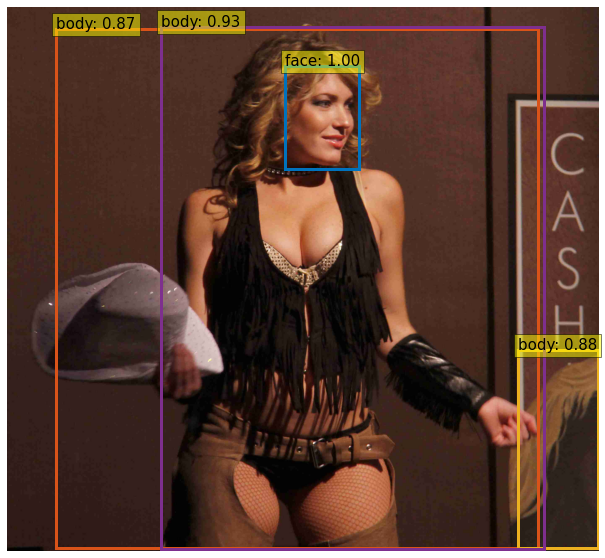

In [41]:
img_name = '/content/new_val2/2017_51967980.jpg'
im = Image.open(img_name)

run_worflow(im,
            model)